In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Symbols can be defined as follows

In [2]:
x = smp.symbols('x')

You can then use various mathematical operators on the defined symbols

In [3]:
x**2

x**2

In [4]:
y = smp.sin(x)

In [5]:
z = y - x**2

In [6]:
z

-x**2 + sin(x)

There are many functions built into sympy

In [7]:
# smp.

Can save expressions in new variables

In [8]:
y = x**2 + 4*x + 3
y

x**2 + 4*x + 3

Do operations on the new variables

In [9]:
z = y**2
z

(x**2 + 4*x + 3)**2

Note that it doesn't expand. There are different methods you need to call to do different things with the expression

In [10]:
z.factor()

(x + 1)**2*(x + 3)**2

In [11]:
z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

In the notation `smp.solve(f, x)`, sympy finds the value of $x$ that makes $f(x) = 0$

In [12]:
smp.solve(z, x)

[-3, -1]

In [13]:
smp.solve(smp.sin(x), x)

[0, pi]

**Good Practice**: If you know that your variable $x$ is real (and in some cases non-negative) it's good to specify this when you define your variables to prevent complicated issues when solving complicated prblems (especially with inegrals)

In [14]:
x = smp.symbols('x')
smp.solve(x**2 + 1, x)

[-I, I]

In [15]:
x = smp.symbols('x', real=True, positive=True)
smp.solve(x**2 + 1, x)

[]

Can define many variables at once

In [16]:
x, y, z = smp.symbols('x y z')
f = x**2 + smp.sin(z)*y
f

x**2 + y*sin(z)

Can also solve multivariable expressions, specifying which variable we want to solve for. In each case $F = 0$ is being solved for

In [17]:
x_sols = smp.solve(f, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [18]:
y_sols = smp.solve(f, y)
y_sols

[-x**2/sin(z)]

In [19]:
z_sols = smp.solve(f, z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

Finally, it may be the case that one has a sympy expression but wants to convert it into a numerical function so they can plot on a computer

In [20]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [21]:
expr_f = smp.lambdify([x, y], expr)
expr_f(1, 2)

3.6651914291880923

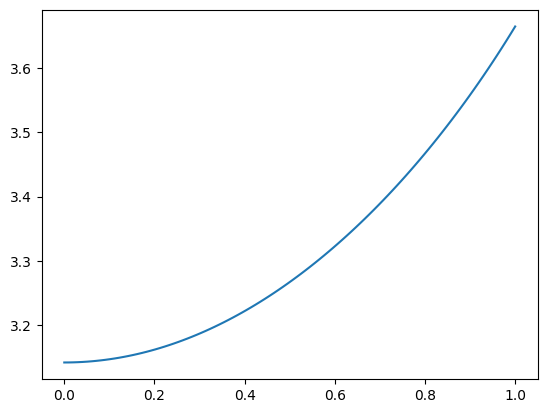

In [22]:
x_num = np.linspace(0, 1, 100)
y_num = 2
plt.plot(x_num, expr_f(x_num, y_num))
plt.show()

For multivariable expressions, can also substitute values in

In [23]:
f

x**2 + y*sin(z)

In [24]:
f.subs([(y, 3), (z, smp.pi/2)])

x**2 + 3

In [25]:
f.subs([(y, smp.cos(z)), (z, y)])

x**2 + sin(y)*cos(y)

## Examples

A falling object encounters a moving platform accelerating upwards:
    
1. Object $h_o(t) = h_0 - v_o t - \frac{1}{2}gt^2$
2. Platform $h_p(t) = v_p t + \frac{1}{2}qt^2$

**Find the initial velocity $v_0$ such that when the object and platform collide, they are moving at the same speed.**

We need to solve for $v_0$ and $t$ in the two equations

1. $h_0(t) = h_p(t)$
2. $ \frac{dh_0}{dt} (t) = - \frac{dh_p}{dt}(t) $

In sympy, need to construct our system of equations as $EQ_1=0$, $EQ_2=0$, ... In our case, we rewrite them as
  
1. $h_0(t) - h_p(t) = 0$
2. $\frac{dh_0}{dt} + \frac{dh_p}{dt} = 0$

In [26]:
t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', real=True, positive=True)

Define expressions

In [27]:
h0t = h0 - v0*t - smp.Rational(1,2)*g*t**2
dh0dt = -g*t - v0
hpt = vp*t + smp.Rational(1,2)*q*t**2
dhpdt = vp + q*t

In [28]:
dh0dt

-g*t - v_0

Define equations

In [29]:
eq1 = h0t - hpt
eq2 = dh0dt + dhpdt

In [30]:
eq1

-g*t**2/2 + h_0 - q*t**2/2 - t*v_0 - t*v_p

Solve equations

In [31]:
smp.solve([eq1, eq2], [t, v0])[0]

((-v_p + v_p*(g + q)/(-g + 3*q) - sqrt(2)*(-g + q)*sqrt(-g*h_0 + 3*h_0*q + 2*v_p**2)/(-g + 3*q))/(-g + q),
 v_p*(g + q)/(-g + 3*q) - sqrt(2)*(-g + q)*sqrt(-g*h_0 + 3*h_0*q + 2*v_p**2)/(-g + 3*q))

In [32]:
t_collide, v_initfall = smp.solve([eq1, eq2], [t, v0])[0]

In [33]:
v_initfall

v_p*(g + q)/(-g + 3*q) - sqrt(2)*(-g + q)*sqrt(-g*h_0 + 3*h_0*q + 2*v_p**2)/(-g + 3*q)

In [34]:
t_collide

(-v_p + v_p*(g + q)/(-g + 3*q) - sqrt(2)*(-g + q)*sqrt(-g*h_0 + 3*h_0*q + 2*v_p**2)/(-g + 3*q))/(-g + q)

**What is the velocity when they collide?**

In [35]:
dh0dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(g*v_p - q*v_p + q*sqrt(-2*g*h_0 + 6*h_0*q + 4*v_p**2))/(-g + 3*q)

In [36]:
dhpdt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(-g*v_p + q*v_p - q*sqrt(-2*g*h_0 + 6*h_0*q + 4*v_p**2))/(-g + 3*q)

# Calculus (1st year)

In [37]:
x = smp.symbols('x')

## Limits

$$\lim_{x \to \pi} \sin(x/2 + \sin(x)) $$

In [38]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

1

## Derivatives

$$ \frac{d}{dx} \left(\frac{1 + \sin{x}}{1 - \cos{x}}\right)^2 $$

In [39]:
smp.diff(((1 + smp.sin(x))/(1 - smp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$ \frac{d}{dx}  f(x + g(x)) $$

In [40]:
f, g = smp.symbols('f g', cls=smp.Function)

In [41]:
g = g(x)
f = f(x + g)

In [42]:
f

f(x + g(x))

In [43]:
dfdx = smp.diff(f, x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [44]:
dfdx.subs([(g, smp.sin(x))]).doit()

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

## Basic Antiderivatives

$$ \int \csc(x) \cot(x) \,dx$$

In [45]:
smp.integrate(smp.csc(x) * smp.cot(x))

-1/sin(x)

## Definite integrals

$$ \int_{0}^{\ln(4)} \frac{e^x \,dx}{\sqrt{e^{2x}+9}} $$

In [46]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

$$.\int_{1}^{t} x^{10} e^x \,dx$$

In [47]:
t = smp.symbols('t')

In [48]:
smp.integrate(x**10*smp.exp(x), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

# Multivariable calculus

In [49]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

## Vectors and Geometry

In [50]:
u = smp.Matrix([u1, u2, u3])
v = smp.Matrix([v1, v2, v3])

### Addition and multiplication

In [51]:
2*u + v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

Dot product

In [52]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

Cross product

In [53]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

Norm

In [54]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

$\text{proj}_v(u) = \frac{u \cdot v}{|v|^2}v$

In [55]:
proj_v_u = u.dot(v) / u.norm()**2 * v
proj_v_u

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)]])

Lines: $ \vec{r}(t) = \vec{r}_0 + t \vec{v}$

In [56]:
r0 = smp.Matrix([1, 1, 1])
v = smp.Matrix([1, 2, -1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[2*t + 1],
[  1 - t]])

Planes: $ \vec{n} \cdot (P_0 - (x, y, z)) = 0 $

In [57]:
P0 = smp.Matrix([4, 4, 8])
r = smp.Matrix([x, y, z])
n = smp.Matrix([1, 1, 1])
n.dot(P0 - r)

-x - y - z + 16

## Vector Calculus
### Vector Derivatives

In [58]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [59]:
smp.diff(r, t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

**Example**: Find the angle between the velocity and accelleration as a function of time $\theta(t)$

In [60]:
v = smp.diff(r, t)
a = smp.diff(v, t)
theta = smp.acos(v.dot(a) / (v.norm() * a.norm())).simplify()
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

Find theta at $t = 6$

In [61]:
theta.subs(t, 6).evalf()

0.251108015692338

## Vector Integrals

(Note: will not add the +C)

In [62]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [63]:
smp.Integral(r, t).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

Some cases integrals can't be solved analytically -> see Second Year in Calculus video

In [64]:
from scipy.integrate import quad_vec
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [65]:
r_f = smp.lambdify([t], r)
r_f(1)

array([[0.4287508 ],
       [0.36787944],
       [0.25      ]])

In [66]:
quad_vec(r_f, 0, 1)[0] # 0th element is the integral, 1st element is the error

array([[0.81549671],
       [0.84483859],
       [0.30229989]])

## Arclength

$$ L = \int_{a}^{v} \sqrt{dx^2 + dy^2 + dz^2} = \int_{a}^{b} \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2} \,dt $$

Rare cases can be done symbolically. Find arclength of $(0, t, t^2)$ from $t = 0$ to $t = 1$

In [67]:
r = smp.Matrix([0, t, t**2])
r

Matrix([
[   0],
[   t],
[t**2]])

In [68]:
smp.diff(r, t)

Matrix([
[  0],
[  1],
[2*t]])

In [69]:
smp.diff(r, t).norm()

sqrt(4*Abs(t)**2 + 1)

In [70]:
smp.integrate(smp.diff(r, t).norm(), (t, 0, 1))

asinh(2)/4 + sqrt(5)/2

## Partial/Directional Derivatives

In [71]:
x, y, z = smp.symbols('x y z')

### Basics
Partial Derivatives $\partial f / \partial x $ and $ \partial f / \partial y $ of $f(x, y) = y^2\sin(x + y)$

In [72]:
f = y**2 * smp.sin(x + y)
f

y**2*sin(x + y)

In [73]:
smp.diff(f, x)

y**2*cos(x + y)

In [74]:
smp.diff(f, y)

y**2*cos(x + y) + 2*y*sin(x + y)

Or more complicated things like $\frac{\partial^2 f}{\partial xy^2}$

In [75]:
smp.diff(f, y, y, x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

## The Chain Rule

In [76]:
t = smp.symbols('t')
x, y, z, w, v = smp.symbols('x y z w v', cls=smp.Function)

* Suppose $x$, $y$, and $z$ are functions of $t$
* $w$ is a function of $x$, $y$, and $z$, i.e. $w = w(x, y, z)$

In [77]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

Can keep things in a more functional form:

In [78]:
w

w(x(t), y(t), z(t))

In [79]:
smp.diff(w, t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

Or put in specific functions

In [80]:
w1 = x**2 + smp.exp(y) * smp.sin(z)
w1

x(t)**2 + exp(y(t))*sin(z(t))

In [81]:
smp.diff(w1, t)

2*x(t)*Derivative(x(t), t) + exp(y(t))*sin(z(t))*Derivative(y(t), t) + exp(y(t))*cos(z(t))*Derivative(z(t), t)

In [82]:
smp.diff(w1, t).subs([(x, smp.sin(t)),
                      (y, smp.cos(t)),
                      (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

## Multiple integrals

In rare cases these can be done symbolically:

$$ \int_{0}^{1} \int_{0}^{1-x^2} \int_{3}^{4 - x^2 - y^2} x \,dz \,dy \,dx$$


In [85]:
x, y, z = smp.symbols('x y z')
f = x
smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

1/8

In [86]:
f

x

# Function notes

Symbolic expression with substitution & evaluation

In [88]:
x, y = smp.symbols('x y')

In [176]:
expr = x**2
expr

x**2

In [179]:
expr.subs(x, 2)

4

Lambdify expression to python function

In [203]:
expr_f = smp.lambdify(x, expr)
expr_f

<function _lambdifygenerated(x)>

In [204]:
type(expr_f)

function

In [205]:
expr_f(2)

4

Symbolic function with substitution

In [198]:
f = smp.symbols('f', cls=smp.Function)
f = f(x)
f

f(x)

In [199]:
f = smp.Function('f')(x)
f

f(x)

In [200]:
f.subs(x, 2)

f(2)

Lambda function

In [206]:
f = smp.Lambda(x, x**2)
f

Lambda(x, x**2)

In [207]:
type(f)

sympy.core.function.Lambda

In [208]:
f(2)

4